In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io #Utilities to read and write images in various formats.
from skimage.segmentation import (morphological_chan_vese, #Morphological Active Contours without Edges (MorphACWE).
                                  checkerboard_level_set)  #Create a checkerboard level set with binary values.


In [14]:
def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in the given list."""
    def _store(x):
        lst.append(np.copy(x))  #almacenar la evolución de los conjuntos de niveles en la lista dada

    return _store


# Morphological ACWE --> Morphological Active Contours without Edges
image = io.imread('IDRiD_01.jpg',as_gray=True)

#almacenar la evolución de los conjuntos de los niveles establecidos en la lista dada.

In [15]:
def Snake(img):
    # Initial level set
    init_ls = checkerboard_level_set(image.shape, 6)
    # List with intermediate results for plotting the evolution
    evolution = []
    callback = store_evolution_in(evolution)
    ls = morphological_chan_vese(image, 35, init_level_set=init_ls, smoothing=3,
                             iter_callback=callback)

    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    ax = axes.flatten()

    ax[0].imshow(image, cmap="gray")
    ax[0].set_axis_off()
    ax[0].contour(ls, [0.5], colors='r')
    ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

    ax[1].imshow(ls, cmap="gray")
    ax[1].set_axis_off()
    contour = ax[1].contour(evolution[2], [0.5], colors='g')
    contour.collections[0].set_label("Iteration 2")
    contour = ax[1].contour(evolution[7], [5], colors='y')
    contour.collections[0].set_label("Iteration 7")
    contour = ax[1].contour(evolution[1], [0.5], colors='r')
    contour.collections[0].set_label("Iteration 35")
    ax[1].legend(loc="upper right")
    title = "Morphological ACWE evolution"
    ax[1].set_title(title, fontsize=12)


   

C:\Users\irene\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: No contour levels were found within the data range.


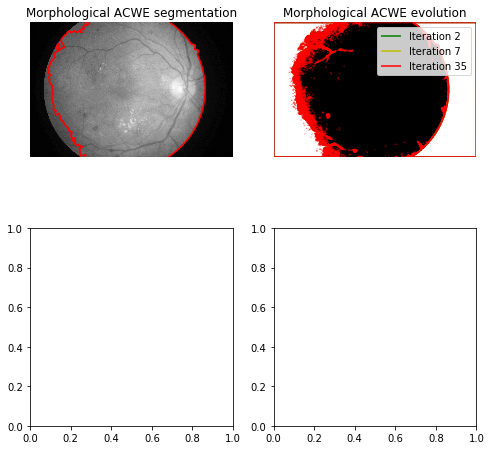

In [16]:
Snake(image)